In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def metrics(l1, l2):
    
    l1_rgb = cv.cvtColor(l1, cv.COLOR_BGR2RGB)
    l2_rgb = cv.cvtColor(l2, cv.COLOR_BGR2RGB)
    plt.subplot(121),plt.imshow(l1_rgb),plt.title('Original')
    plt.subplot(122),plt.imshow(l2_rgb),plt.title('Enhanced')
        
    mse = np.sum((np.array(l1, dtype=np.float32) - np.array(l2, dtype=np.float32)) ** 2)/(l1.shape[0] * l1.shape[1])
    print("MSE value is",mse)
    if(mse == 0):
        psnr = 100    # MSE is zero means no noise is present in the signal . 
        print("PSNR value is",psnr)         # Therefore PSNR have no importance. 
#         return psnr, mse

    else:
        max_pixel = 255 # L-1
        psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
        print("PSNR value is",psnr)
#         return psnr, mse

<ipython-input-3-59f5ac0f70cd>:5: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(im + 1)


MSE value is 112988.25025641026
PSNR value is -2.399529223135591


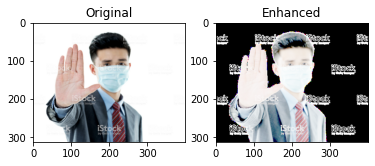

In [3]:
# log transformation

def log(im):
    c = 255/(np.log(1 + np.max(im))) 
    log_transformed = c * np.log(im + 1) 
    log_transformed = log_transformed.astype(np.uint8)
    return log_transformed
        
im = cv.imread("mask.png") 
log_transformed = log(im)
metrics(im, log_transformed)

MSE value is 2308.622564102564
PSNR value is 14.497274248005711


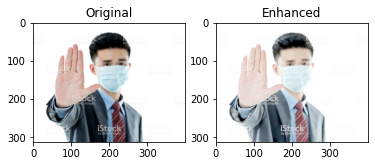

In [4]:
# gamma transformation

def gamma(im, value):
    gamma_corrected = np.array(255*(im / 255) ** value, dtype = 'uint8')
    return gamma_corrected

gamma_corrected = gamma(im,0.5)
metrics(im, gamma_corrected)

MSE value is 13963.018461538462
PSNR value is 6.681010486346746


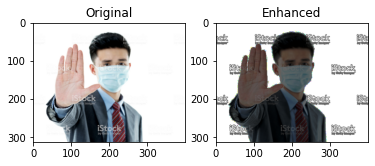

In [5]:
def hist(im):
    hist, bins = np.histogram(im.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    histogram_equalized = cdf[im]
    return histogram_equalized

histogram_equalized = hist(im)
metrics(im,histogram_equalized)

In [6]:
def metrics1(l1, l2):
    
    plt.subplot(121),plt.imshow(l1),plt.title('Original')
    plt.subplot(122),plt.imshow(l2),plt.title('Enhanced')
        
    mse = np.sum((np.array(l1, dtype=np.float32) - np.array(l2, dtype=np.float32)) ** 2)/(l1.shape[0] * l1.shape[1])
    print("MSE value is",mse)
    if(mse == 0):
        psnr = 100    # MSE is zero means no noise is present in the signal . 
        print("PSNR value is",psnr)         # Therefore PSNR have no importance. 
#         return psnr, mse

    else:
        max_pixel = 255 # L-1
        psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
        print("PSNR value is",psnr)
#         return psnr, mse

In [7]:
# image smoothing (blurring)

MSE value is 683.3192307692308
PSNR value is 19.784567175498257


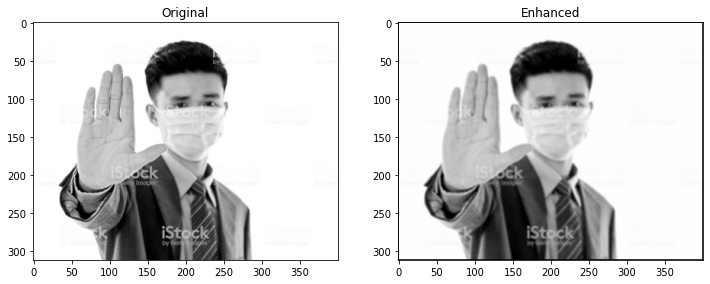

In [8]:
# using average filter

def avg(im):
    m, n = im.shape

    # develop averaging filter mask of size(3, 3) 
    mask = np.ones([3, 3], dtype = np.float32) 
    mask = mask / 9
   
    img_new = np.zeros([m, n]) 

    # convolve the mask over the image  
    for i in range(1, m-1): 
        for j in range(1, n-1): 
            temp = im[i-1, j-1]*mask[0, 0]+im[i-1, j]*mask[0, 1]+im[i-1, j + 1]*mask[0, 2]+im[i, j-1]*mask[1, 0]+ im[i, j]*mask[1, 1]+im[i, j + 1]*mask[1, 2]+im[i + 1, j-1]*mask[2, 0]+im[i + 1, j]*mask[2, 1]+im[i + 1, j + 1]*mask[2, 2] 

            img_new[i, j]= temp 

    img_new = img_new.astype(np.uint8) 
    return img_new

grey_im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
avg_new = avg(grey_im)
plt.figure(figsize = [12, 8])
metrics(grey_im, avg_new)

MSE value is 670.4005128205129
PSNR value is 19.867460230335276


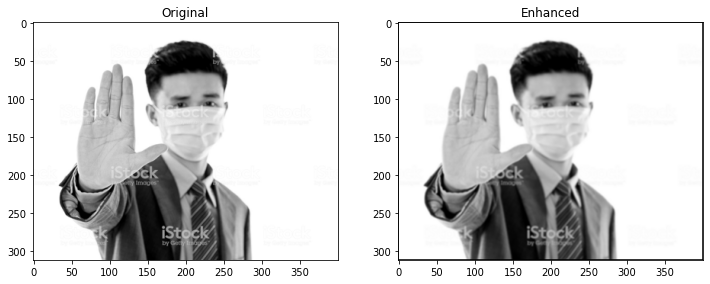

In [9]:
# using weighted average filter

def wavg(im):
    m, n = im.shape

    # develop averaging filter mask of size(3, 3) 
    mask = np.ones([3, 3], dtype = np.float32) 
    mask[0,1] = mask[1,0]= mask[2,1]= mask[1,2]= 2
    mask[1,1] = 4
    mask = mask / 16
   
    img_new = np.zeros([m, n]) 

    # convolve the mask over the image  
    for i in range(1, m-1): 
        for j in range(1, n-1): 
            temp = im[i-1, j-1]*mask[0, 0]+im[i-1, j]*mask[0, 1]+im[i-1, j + 1]*mask[0, 2]+im[i, j-1]*mask[1, 0]+ im[i, j]*mask[1, 1]+im[i, j + 1]*mask[1, 2]+im[i + 1, j-1]*mask[2, 0]+im[i + 1, j]*mask[2, 1]+im[i + 1, j + 1]*mask[2, 2] 

            img_new[i, j]= temp 

    img_new = img_new.astype(np.uint8) 
    return img_new

wavg_new = wavg(grey_im)
plt.figure(figsize = [12, 8])
metrics(grey_im, wavg_new)

MSE value is 60.06491987179487
PSNR value is 30.344594588180822


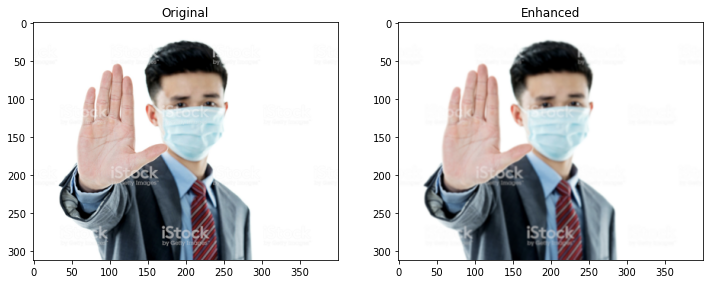

In [11]:
# gaussian blurring

blur = cv.GaussianBlur(im,(3,3),0)
plt.figure(figsize = [12, 8])
metrics(im, blur)

MSE value is 667.0224358974359
PSNR value is 19.889399188215553


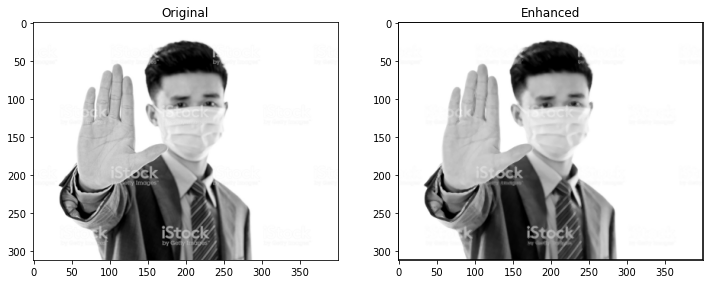

In [12]:
# using median filter

def median(im):
    m, n = im.shape 
    # traverse the image. For every 3X3 area, find the median of the pixels and replace the ceter pixel by the median 
    img_new = np.zeros([m, n]) 

    for i in range(1, m-1): 
        for j in range(1, n-1): 
            temp = [im[i-1, j-1], im[i-1, j], im[i-1, j + 1], im[i, j-1], im[i, j], im[i, j + 1], im[i + 1, j-1], im[i + 1, j], im[i + 1, j + 1]] 

            temp = sorted(temp) 
            img_new[i, j]= temp[4]

    img_new = img_new.astype(np.uint8) 
    return img_new

median_new = median(grey_im)
plt.figure(figsize = [12, 8])
metrics(grey_im, median_new)

MSE value is 173.01955128205128
PSNR value is 25.749851795070523


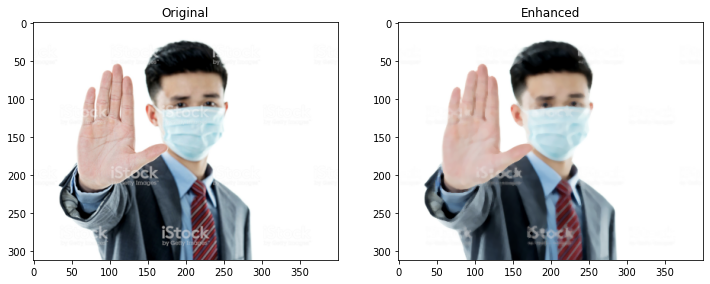

In [13]:
# using median filter in cv2

cvmedian = cv.medianBlur(im,5)
plt.figure(figsize = [12, 8])
metrics(im, cvmedian)

In [14]:
# image sharpening

MSE value is 140848.67282051282
PSNR value is -3.356723982320618


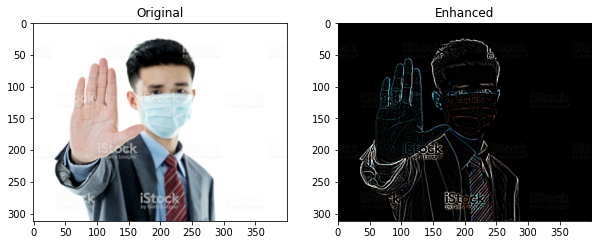

In [15]:
def sharpen(im):
    kernel = np.array([[1, 1, 1],
                      [1, -8, 1],
                      [1, 1, 1]])
    shrp_img = cv.filter2D(im,-1,kernel)
    return shrp_img

shrp_img = sharpen(im)
plt.figure(figsize = [10, 6])
metrics(im, shrp_img)

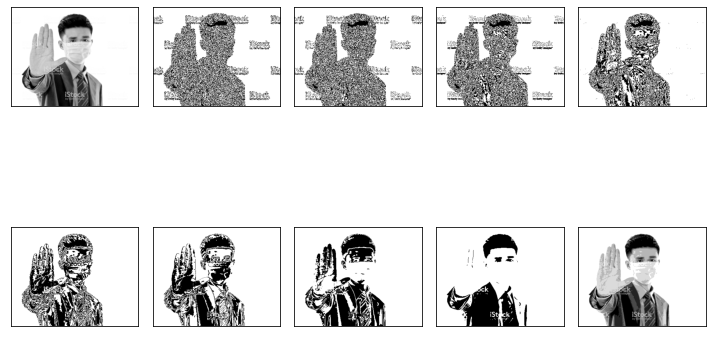

In [16]:
def extract_bit_plane(cd):
    #  extracting all bit one by one from 1st to 8th in variable == from c1 to c8 respectively 
    c1 = np.mod(cd, 2)
    c2 = np.mod(np.floor(cd/2), 2)
    c3 = np.mod(np.floor(cd/4), 2)
    c4 = np.mod(np.floor(cd/8), 2)
    c5 = np.mod(np.floor(cd/16), 2)
    c6 = np.mod(np.floor(cd/32), 2)
    c7 = np.mod(np.floor(cd/64), 2)
    c8 = np.mod(np.floor(cd/128), 2)

    # combining image again to form equivalent to original grayscale image 
    cc = 2 * (2 * (2 * c8 + c7) + c6) # reconstructing image  with 3 most significant bit planes
    to_plot = [cd, c1, c2, c3, c4, c5, c6, c7, c8, cc]
    
    fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for ax, i in zip(axes.flat, to_plot):
        ax.imshow(i, cmap='gray')

    plt.tight_layout()
    plt.show()
    return cc

re_img = extract_bit_plane(grey_im)

In [17]:
# roberts and sobel filter

from skimage import filters

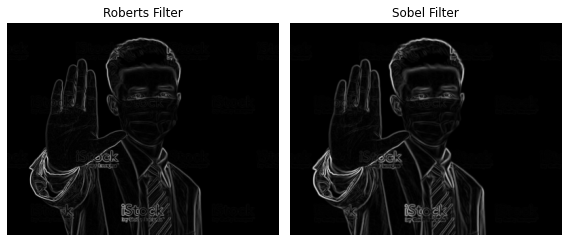

In [18]:
def roberts_and_sobel(chosen_img): 
    edge_roberts = filters.roberts(chosen_img)
    edge_sobel = filters.sobel(chosen_img)

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                             figsize=(8, 4))

    axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
    axes[0].set_title('Roberts Filter')

    axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
    axes[1].set_title('Sobel Filter')

    for ax in axes:
        ax.axis('off')

    plt.tight_layout()
    plt.show()
    return edge_roberts, edge_sobel

edge_roberts, edge_sobel = roberts_and_sobel(grey_im)